In [31]:
import pandas as pd 
import numpy as np 
import matplotlib
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
df = pd.read_csv(("sample_data.csv"))
df

street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   price   latitude   longitude  
0    Residential  Wed May 21 00:00:00 EDT 2008   59222  38.631913 -121.434879  
1    Residential  Wed May 21 00:00:00 EDT 2008   68212  38.478902 -121.431028  
2    Residential  Wed May 21 00:00:00 EDT 2008   68880  38.618305 -121.443839  
3    Residential  Wed May 21 00:00:00 EDT 2008   69307  38.616835 -121.439146  
4    Residential  Wed May 21 00:00:00 EDT 2008   81900  38.519470 -121.435768  
..           ...                           ...     ...        ...         ...  
980  Residential  Thu May 15 00:00:00 EDT 2008  232425  38.457679 -121.359620  
981  Residential  Thu May 15 00:00:00 EDT 2008  234000  38.499893 -121.458890  
982  Residential  Thu May 15 00:00:00 EDT 2008  235000  38.708824 -121.256803  
983  Residential  Thu May 15 00:00:00 EDT 2008  235301  38.417000 -121.397424  
984  Residential  Thu May 15 00:00:00 EDT 2008  235738  38.655245 -121.075915  

[985 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df)
# profile.to_file(output_file = "area_details.html" ) # creation of pandas profile report for easy understanding of the data

In [6]:
df.shape 

(985, 12)

### In Data Analysis We will Analyze To Find out the below stuff ###
### 1. Missing Values ###
### 2. All The Numerical Variables ###
### 3. Distribution of the Numerical Variables ###
### 4. Categorical Variables ###
### 5. Outliers ###
### 6. Relationship between independent and dependent feature(SalePrice) ###

# ** 1. Missing Values**


In [7]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1] #list comprehension use

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

### There are no missing values in the data set 

# ** 2. All The Numerical Variables **

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  7


zip  beds  baths  sq__ft  price   latitude   longitude
0  95838     2      1     836  59222  38.631913 -121.434879
1  95823     3      1    1167  68212  38.478902 -121.431028
2  95815     2      1     796  68880  38.618305 -121.443839
3  95815     2      1     852  69307  38.616835 -121.439146
4  95824     2      1     797  81900  38.519470 -121.435768

## *let us check for decreate values*

In [9]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [10]:
discrete_feature

['beds', 'baths']

In [11]:
df.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

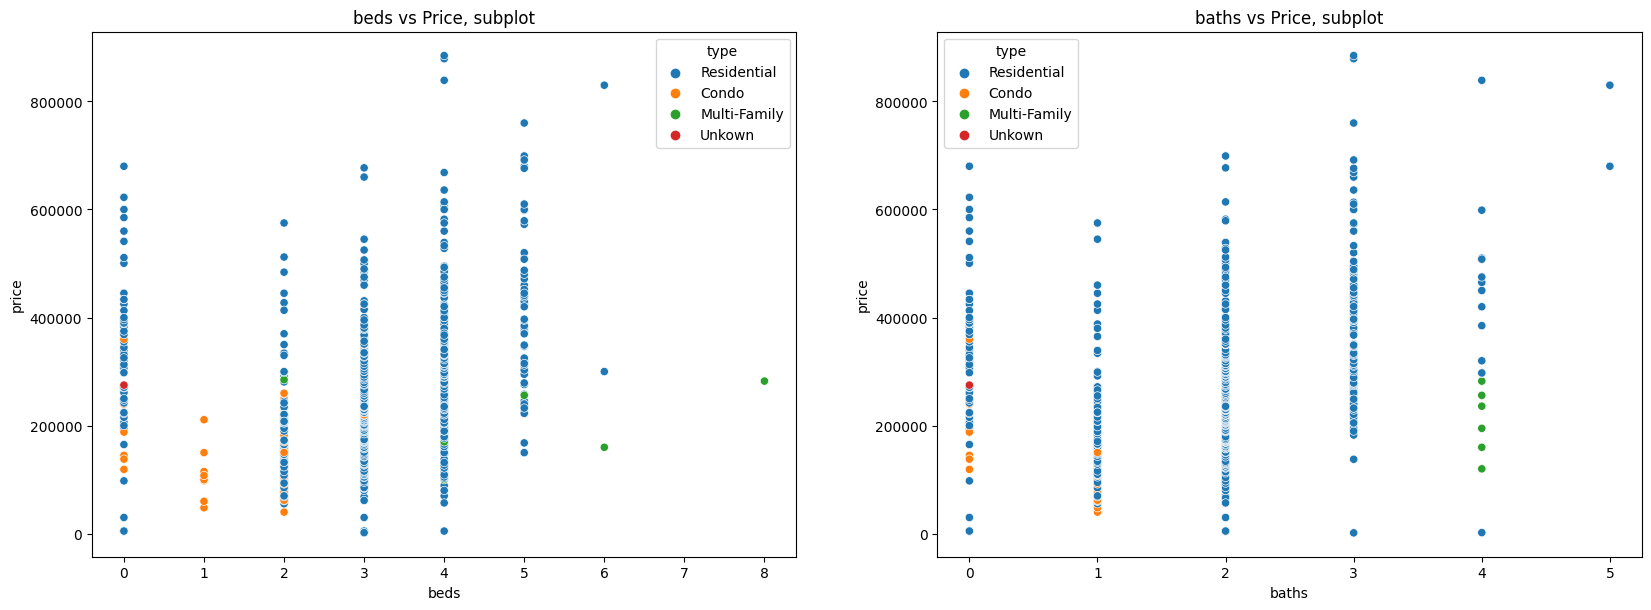

In [25]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in discrete_feature:
    plt.subplot(a, b, c)
    plt.title('{} vs Price, subplot'.format(i))

    sns.scatterplot(x= i, y = "price" ,data=df, hue = "type" )
      
    # plt.title(f" Gender vs {i}")

    c = c + 1

plt.show()

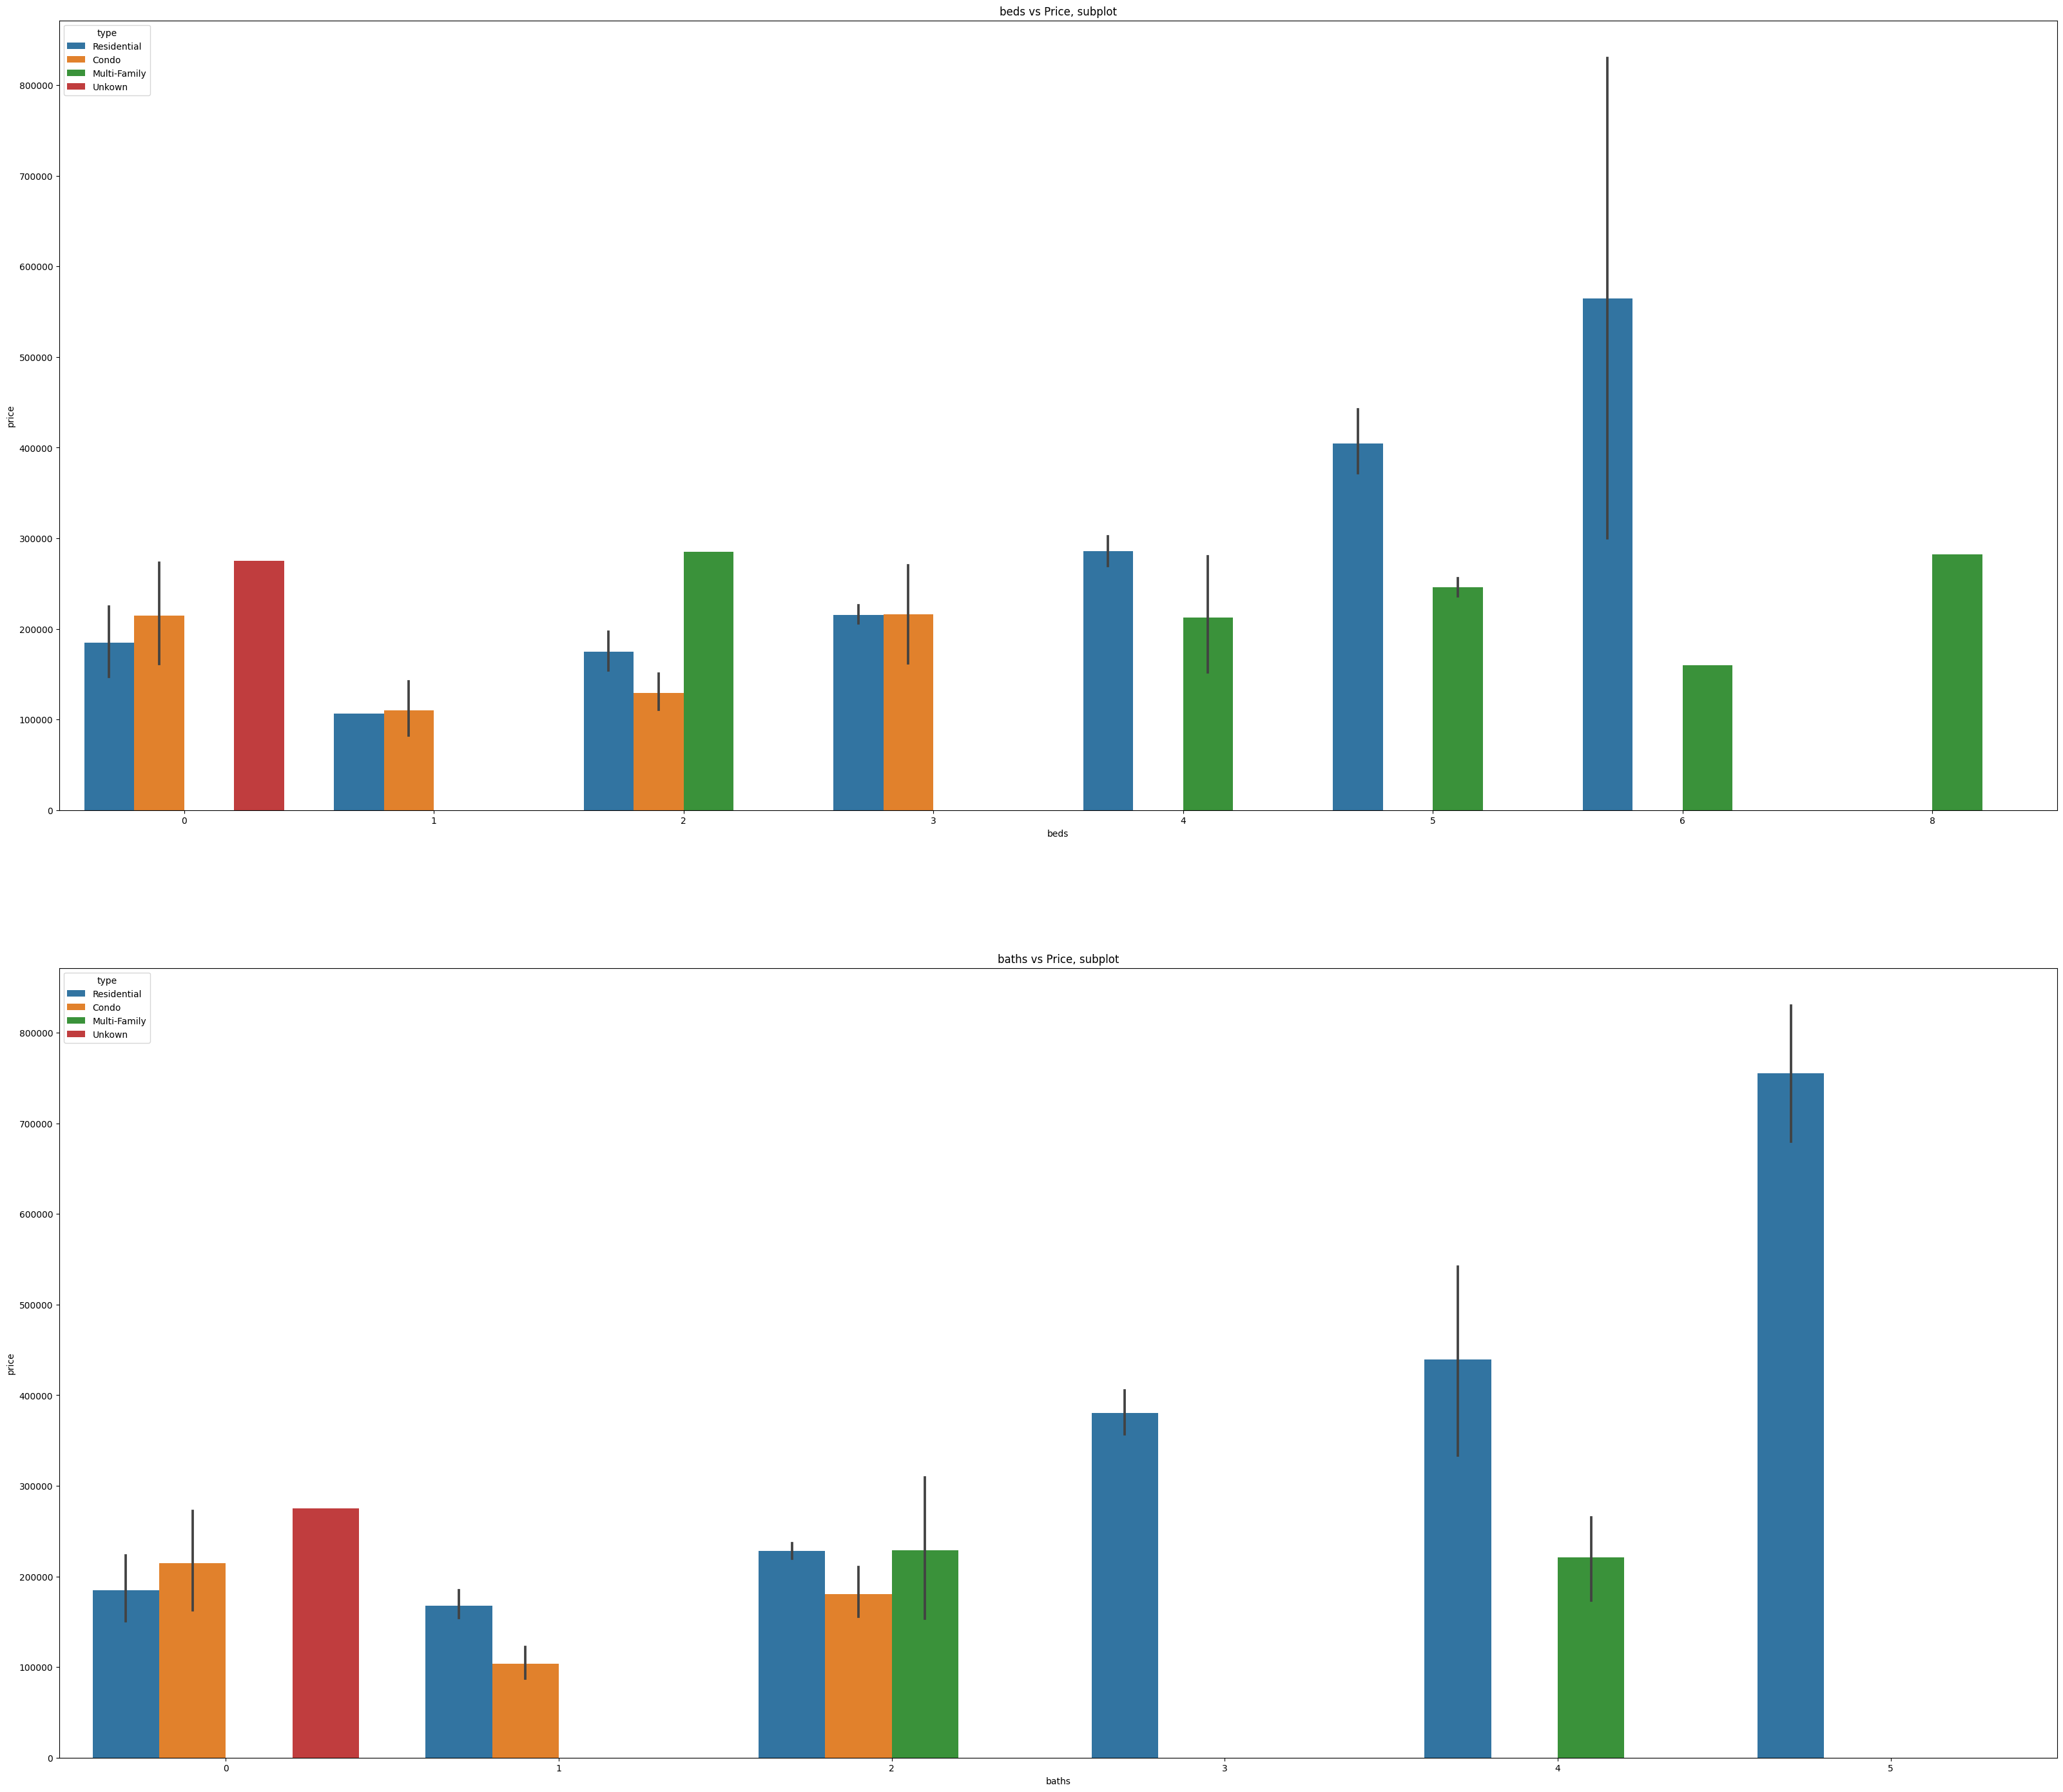

In [53]:
a = 2  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40,35))

for i in discrete_feature:
    plt.subplot(a, b, c)
    plt.title('{} vs Price, subplot'.format(i))

    sns.barplot(x= i, y = "price" ,data=df, hue = "type" )
      
    # plt.title(f" Gender vs {i}")

    c = c + 1

plt.show()

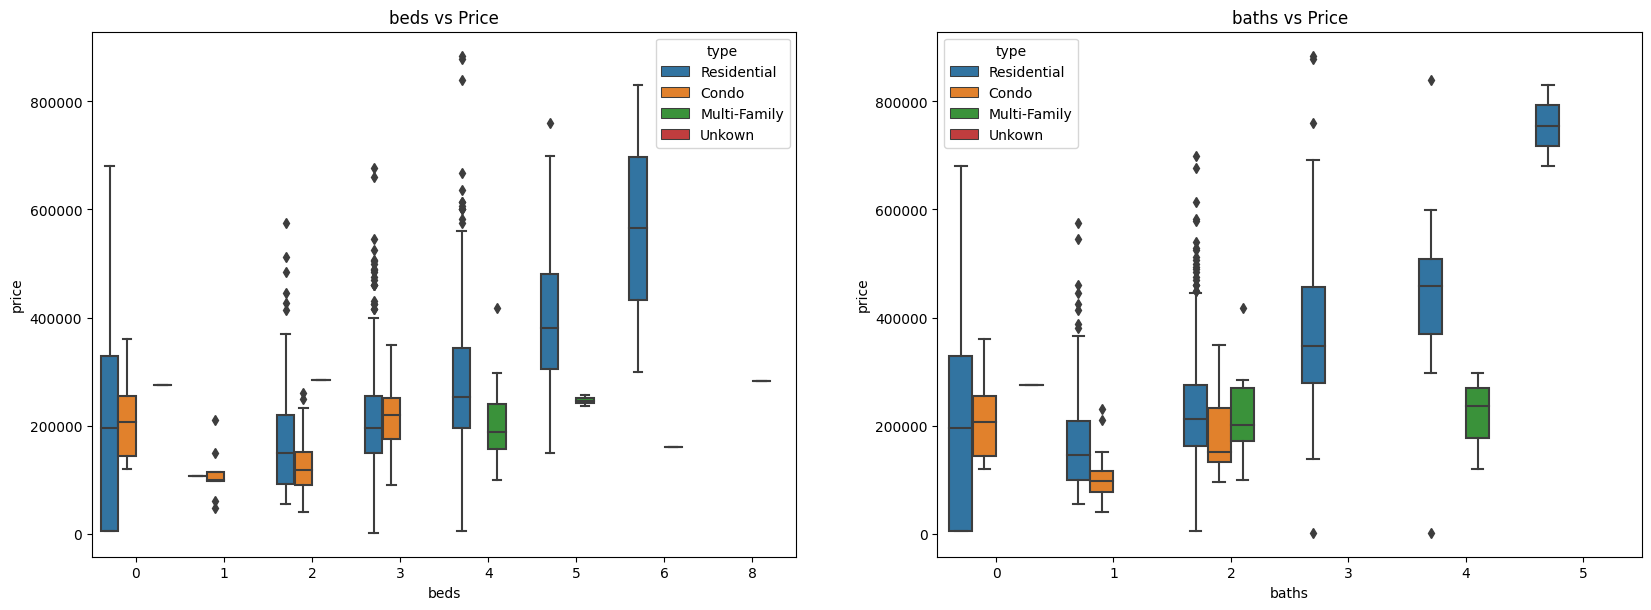

In [56]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in discrete_feature:
    plt.subplot(a, b, c)
    plt.title('{} vs Price'.format(i))

    sns.boxplot(x= i, y = "price" ,data=df, hue = "type" )
      
    # plt.title(f" Gender vs {i}")

    c = c + 1

plt.show()

## ** Continous Features **

In [57]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [74]:
continuous_feature

['zip', 'sq__ft', 'price', 'latitude', 'longitude']

### We are not plotting latitude & longitude values 

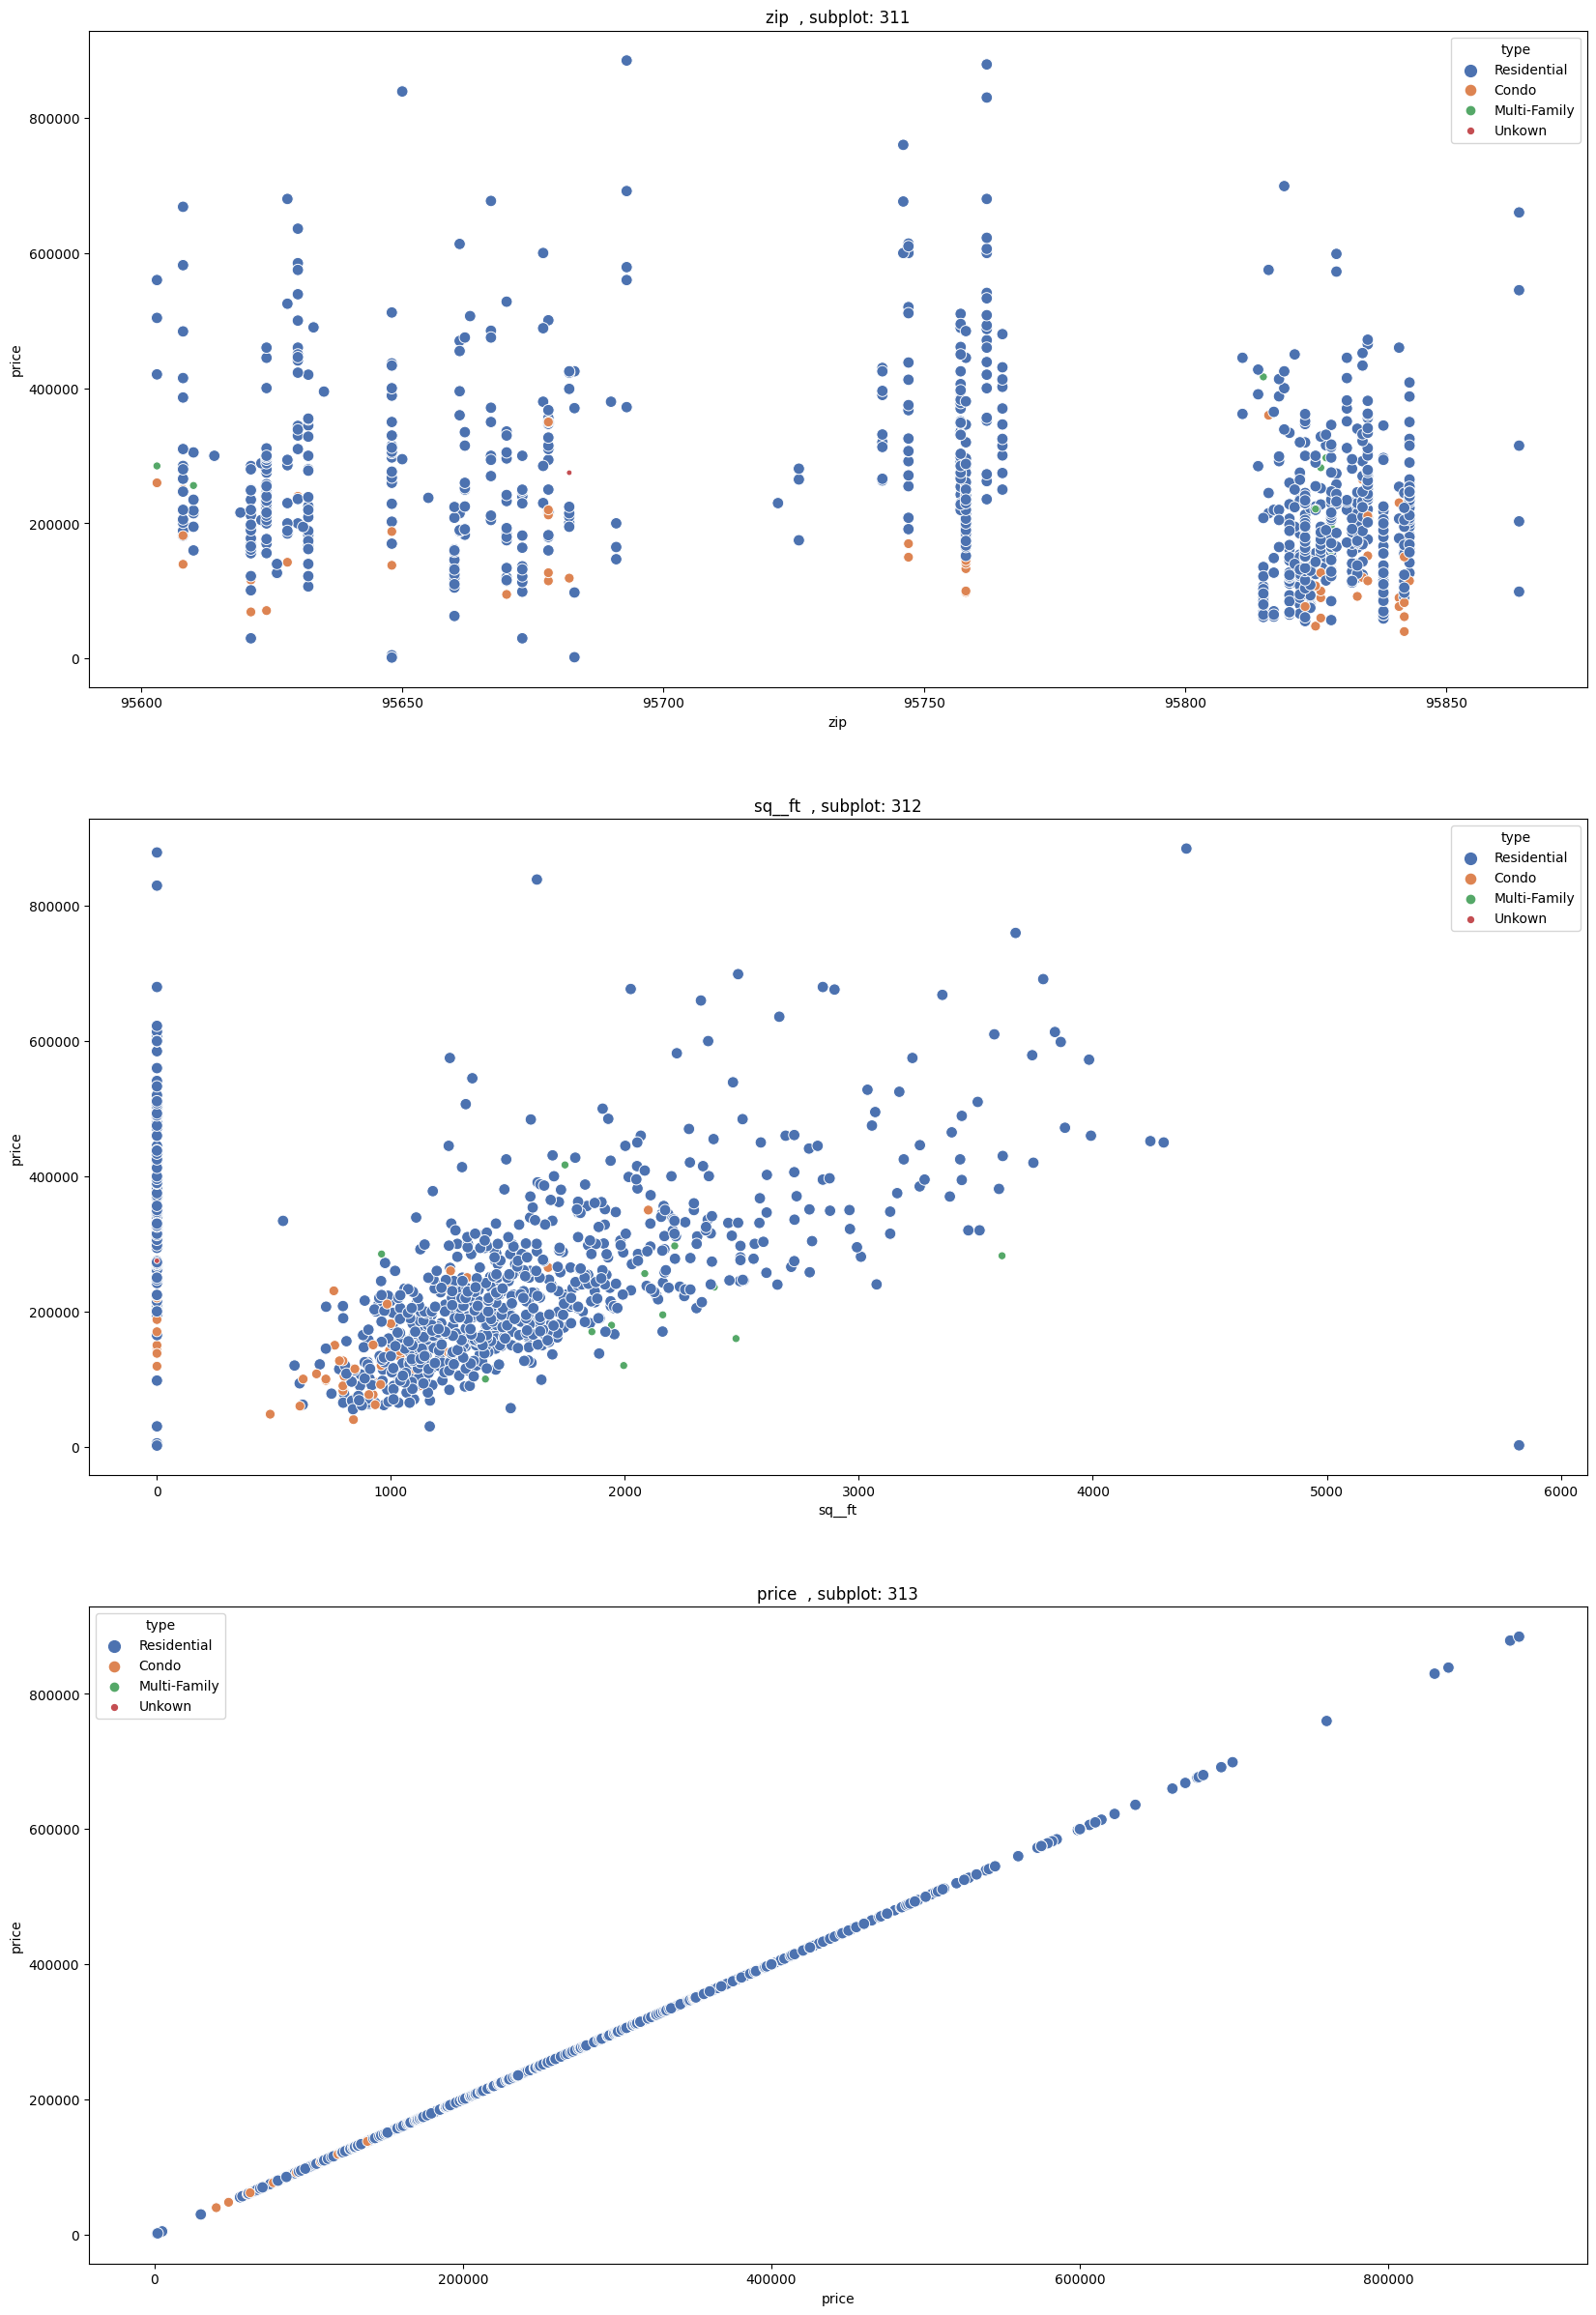

In [145]:
a = 3  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

# fig = plt.figure(figsize=(20,55))
fig = plt.figure(figsize=(20,30))
for i in continuous_feature[0:3]:

    plt.subplot(a, b, c)
    plt.title('{}  , subplot: {}{}{}'.format(i, a, b, c))

    sns.scatterplot(data= df, x= i, y = "price", hue="type",palette="deep", size= "type" )

    c = c + 1

plt.show()

<Figure size 3000x4000 with 0 Axes>

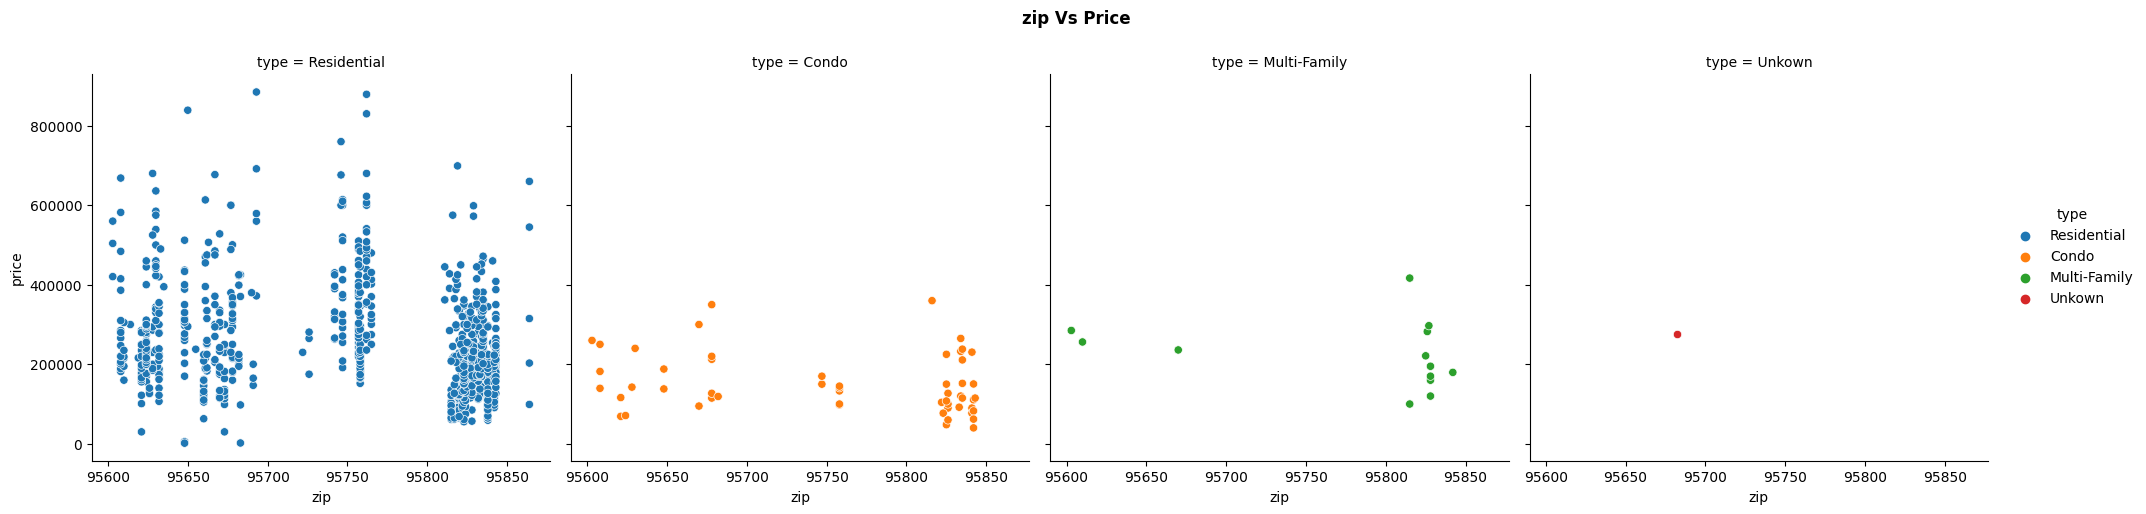

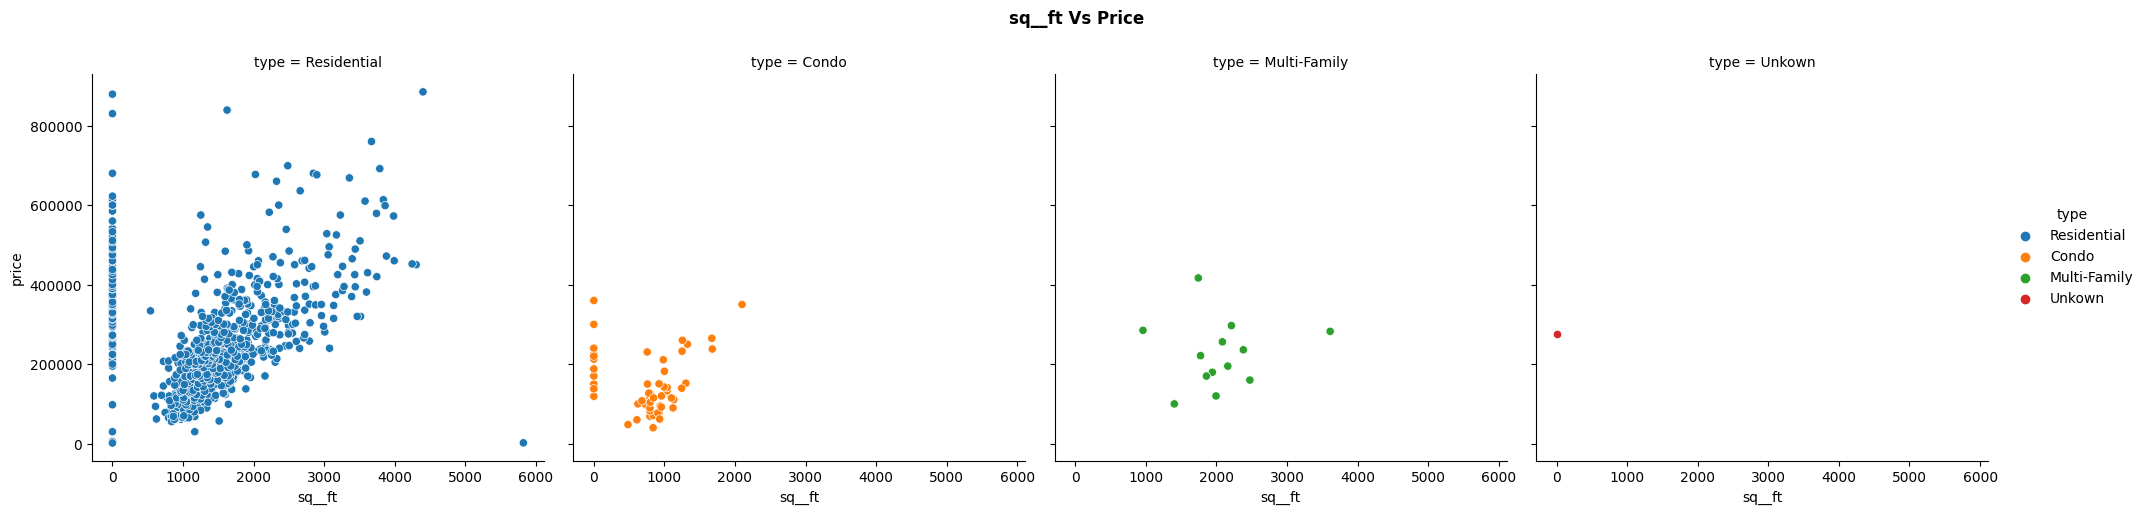

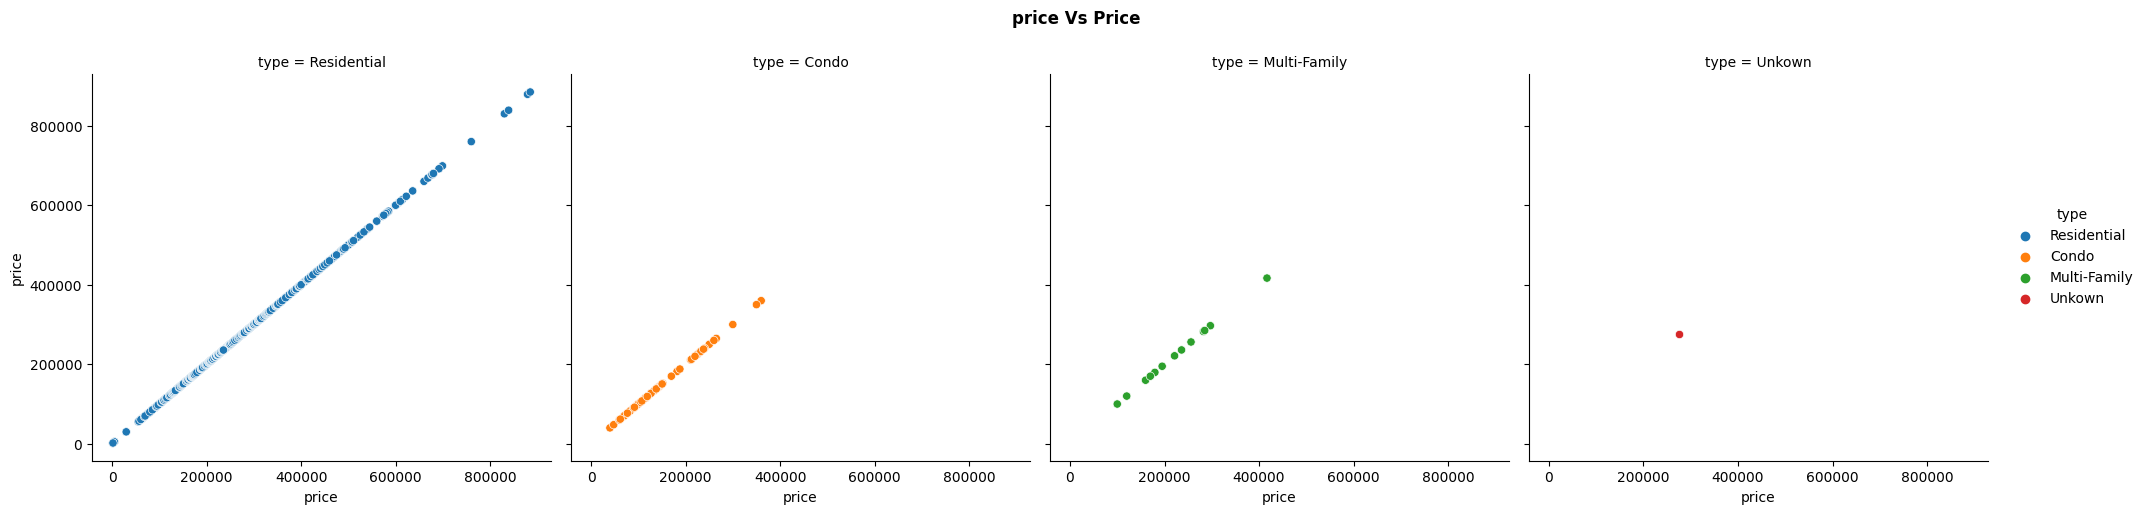

In [158]:

fig = plt.figure(figsize=(30,40))

for i in continuous_feature[0:3]:
    g = sns.relplot(data= df, x= i, y = "price", col="type", hue="type",kind="scatter")
    g.fig.suptitle(f"{i} Vs Price", fontweight ="bold")
    plt.subplots_adjust(top=0.85)

plt.show()

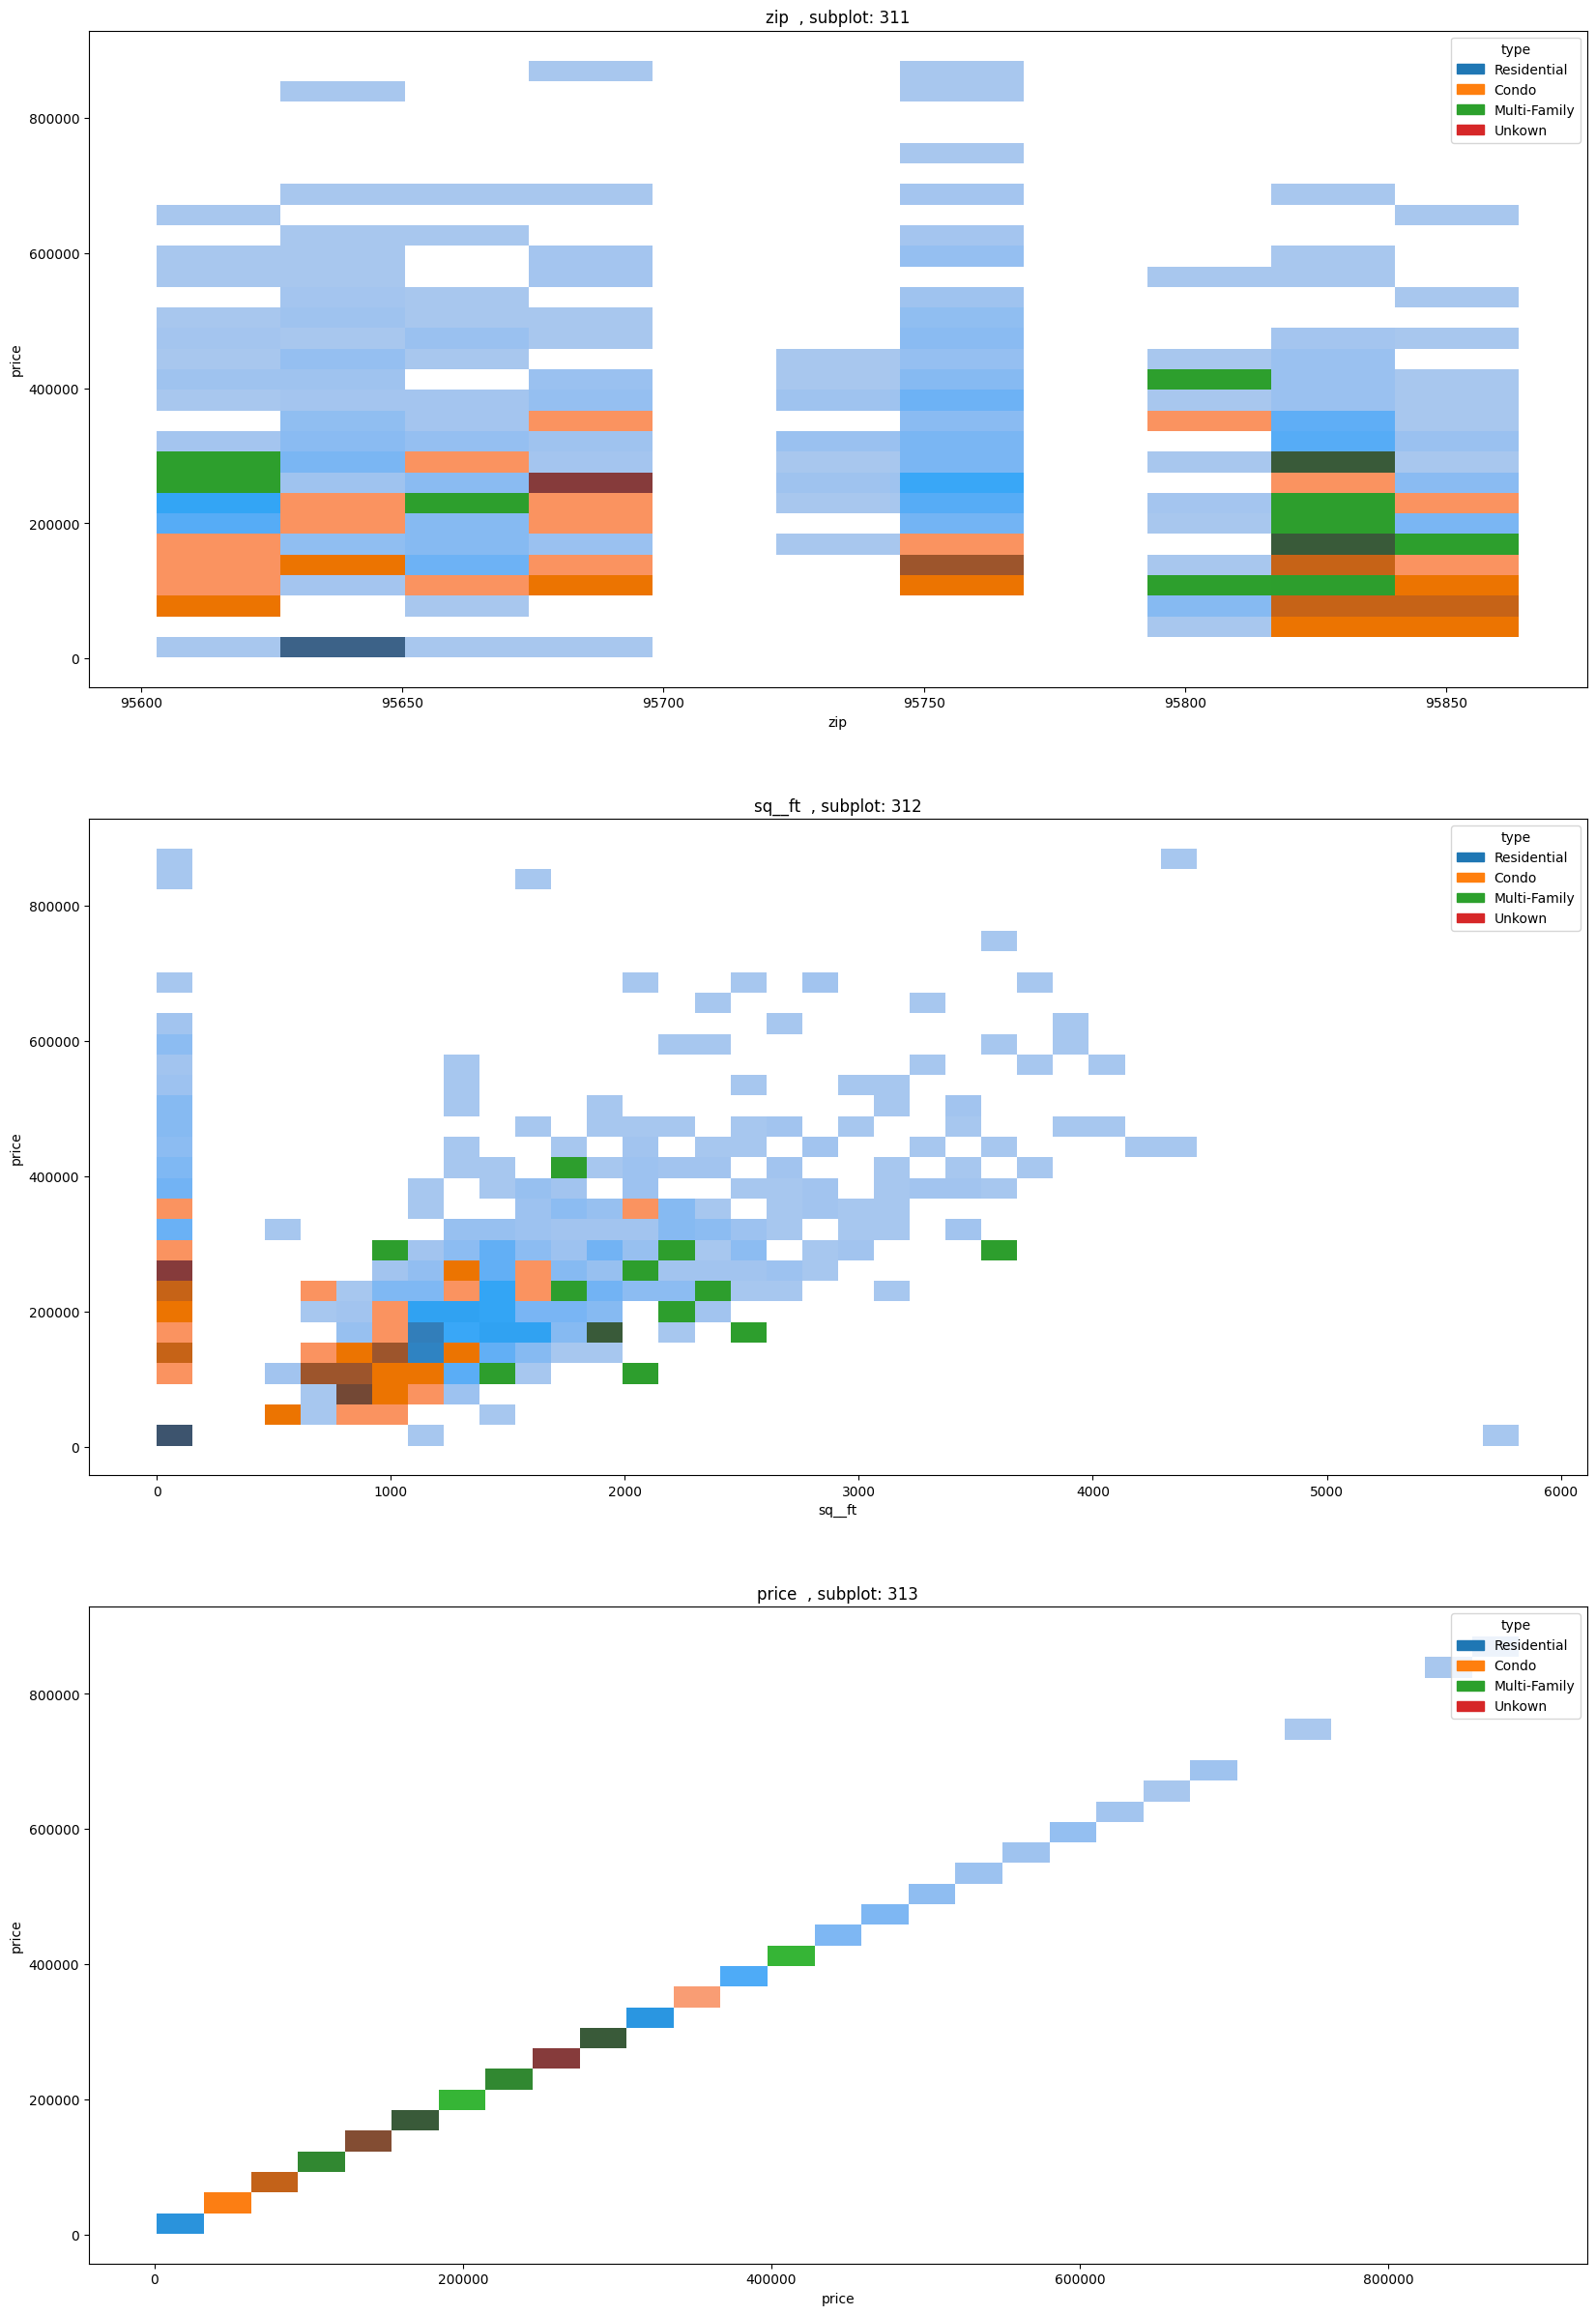

In [111]:
a = 3  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

# fig = plt.figure(figsize=(20,55))
fig = plt.figure(figsize=(20,30))
for i in continuous_feature[0:3]:

    plt.subplot(a, b, c)
    plt.title('{}  , subplot: {}{}{}'.format(i, a, b, c))


    sns.histplot(data= df, x= i, y = "price", hue="type", stat="density", common_norm=False,)
    

    
    

    c = c + 1

plt.show()

## latitude & longitude values 

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.



<Figure size 4000x3000 with 0 Axes>

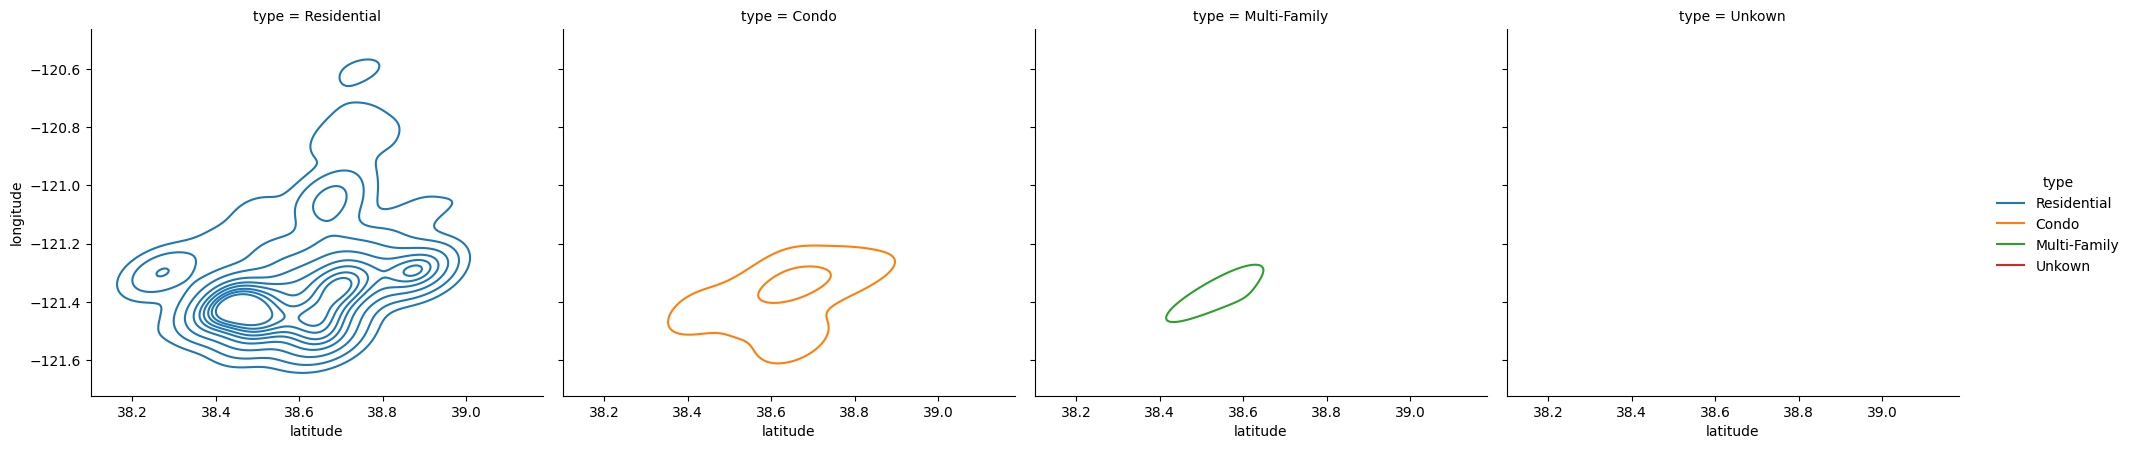

In [162]:
plt.figure(figsize=(40,30))
sns.displot(data= df, x=  'latitude' , y= 'longitude', kind="kde", hue= "type", col="type")

g.fig.suptitle("Latitude & longitude positions of the houses", fontweight ="bold")
plt.subplots_adjust(top=0.85)
plt.show()

# **OUTLIERS **

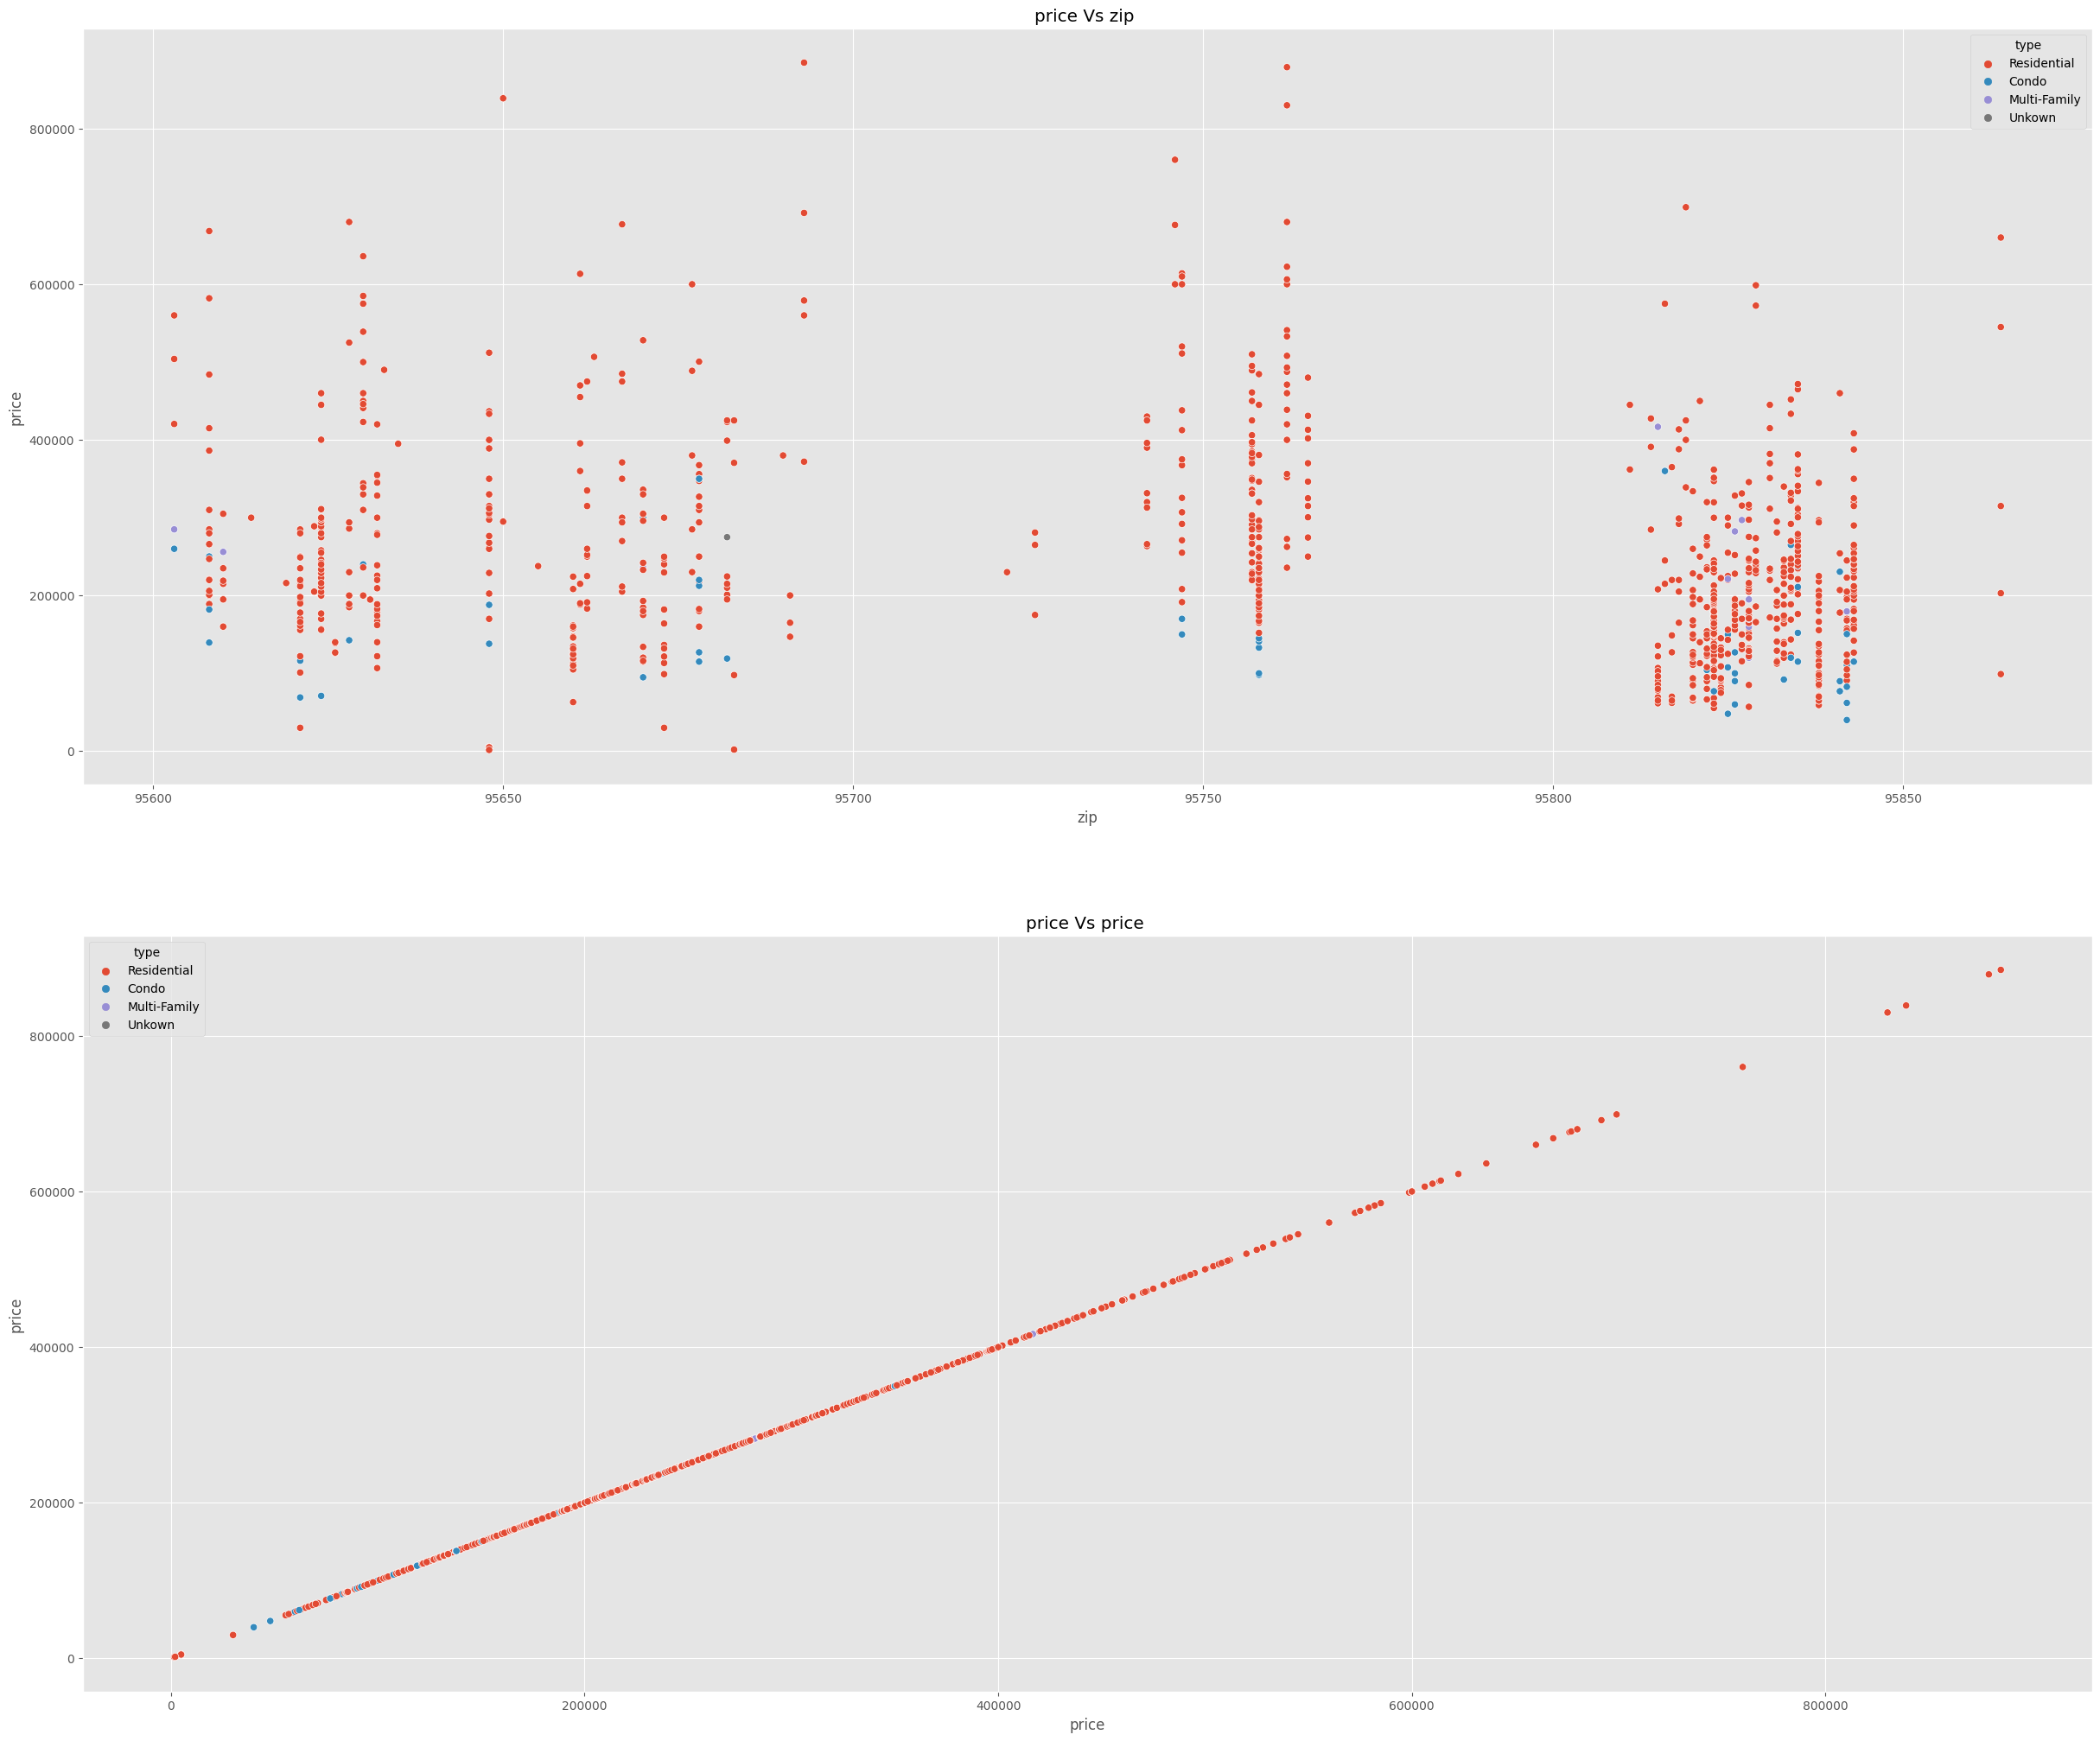

In [172]:
a = 2  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30, 25))

plt.style.use("ggplot")

for i in continuous_feature[0:3]:
    data=df.copy()

    if 0 in data[i].unique():
        pass
    else:
        plt.subplot(a, b, c)
        plt.title('price Vs {} '.format(i))

        sns.scatterplot(x=i , y = "price" ,data=df, hue= "type")

        c = c + 1


## ** categorical vairables **

In [173]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['street', 'city', 'state', 'type', 'sale_date']

In [175]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))


The feature is street and number of categories are 981
The feature is city and number of categories are 39
The feature is state and number of categories are 1
The feature is type and number of categories are 4
The feature is sale_date and number of categories are 5


In [176]:
df.street.value_counts()

8306 CURLEW CT         2
1223 LAMBERTON CIR     2
4734 14TH AVE          2
7 CRYSTALWOOD CIR      2
8515 DARTFORD DR       1
                      ..
8 TIDE CT              1
306 CAMELLIA WAY       1
3427 LA CADENA WAY     1
5651 OVERLEAF WAY      1
29 COOL FOUNTAIN CT    1
Name: street, Length: 981, dtype: int64

### There are many streeets with just 1 loaction, so We'll avoid it for plotting

In [177]:
categorical_features[1:]

['city', 'state', 'type', 'sale_date']

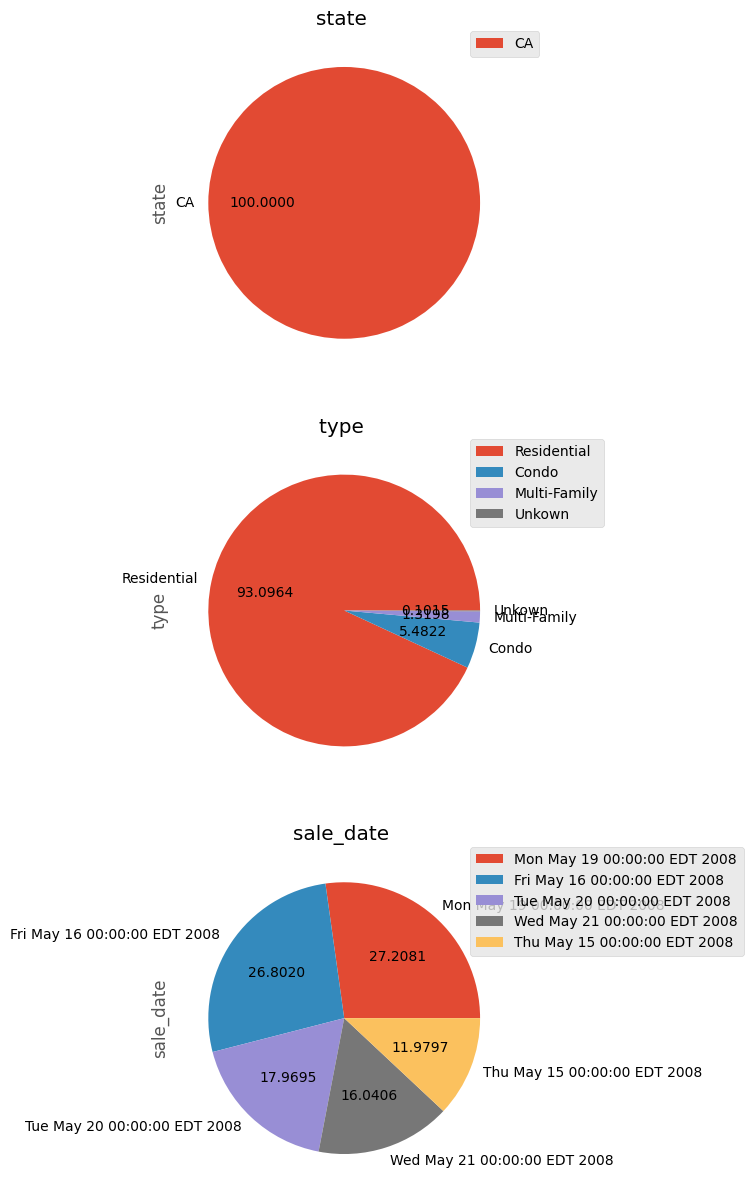

In [198]:
a = 3  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))
plt.style.use("ggplot")

for i in categorical_features[2:]:
    plt.subplot(a, b, c)
    plt.title('{} '.format(i))
    df[i].value_counts().plot(kind='pie', autopct='%.4f')
    plt.legend( bbox_to_anchor=(0.85,1.025), loc="upper left")
    

    c = c + 1

plt.show()

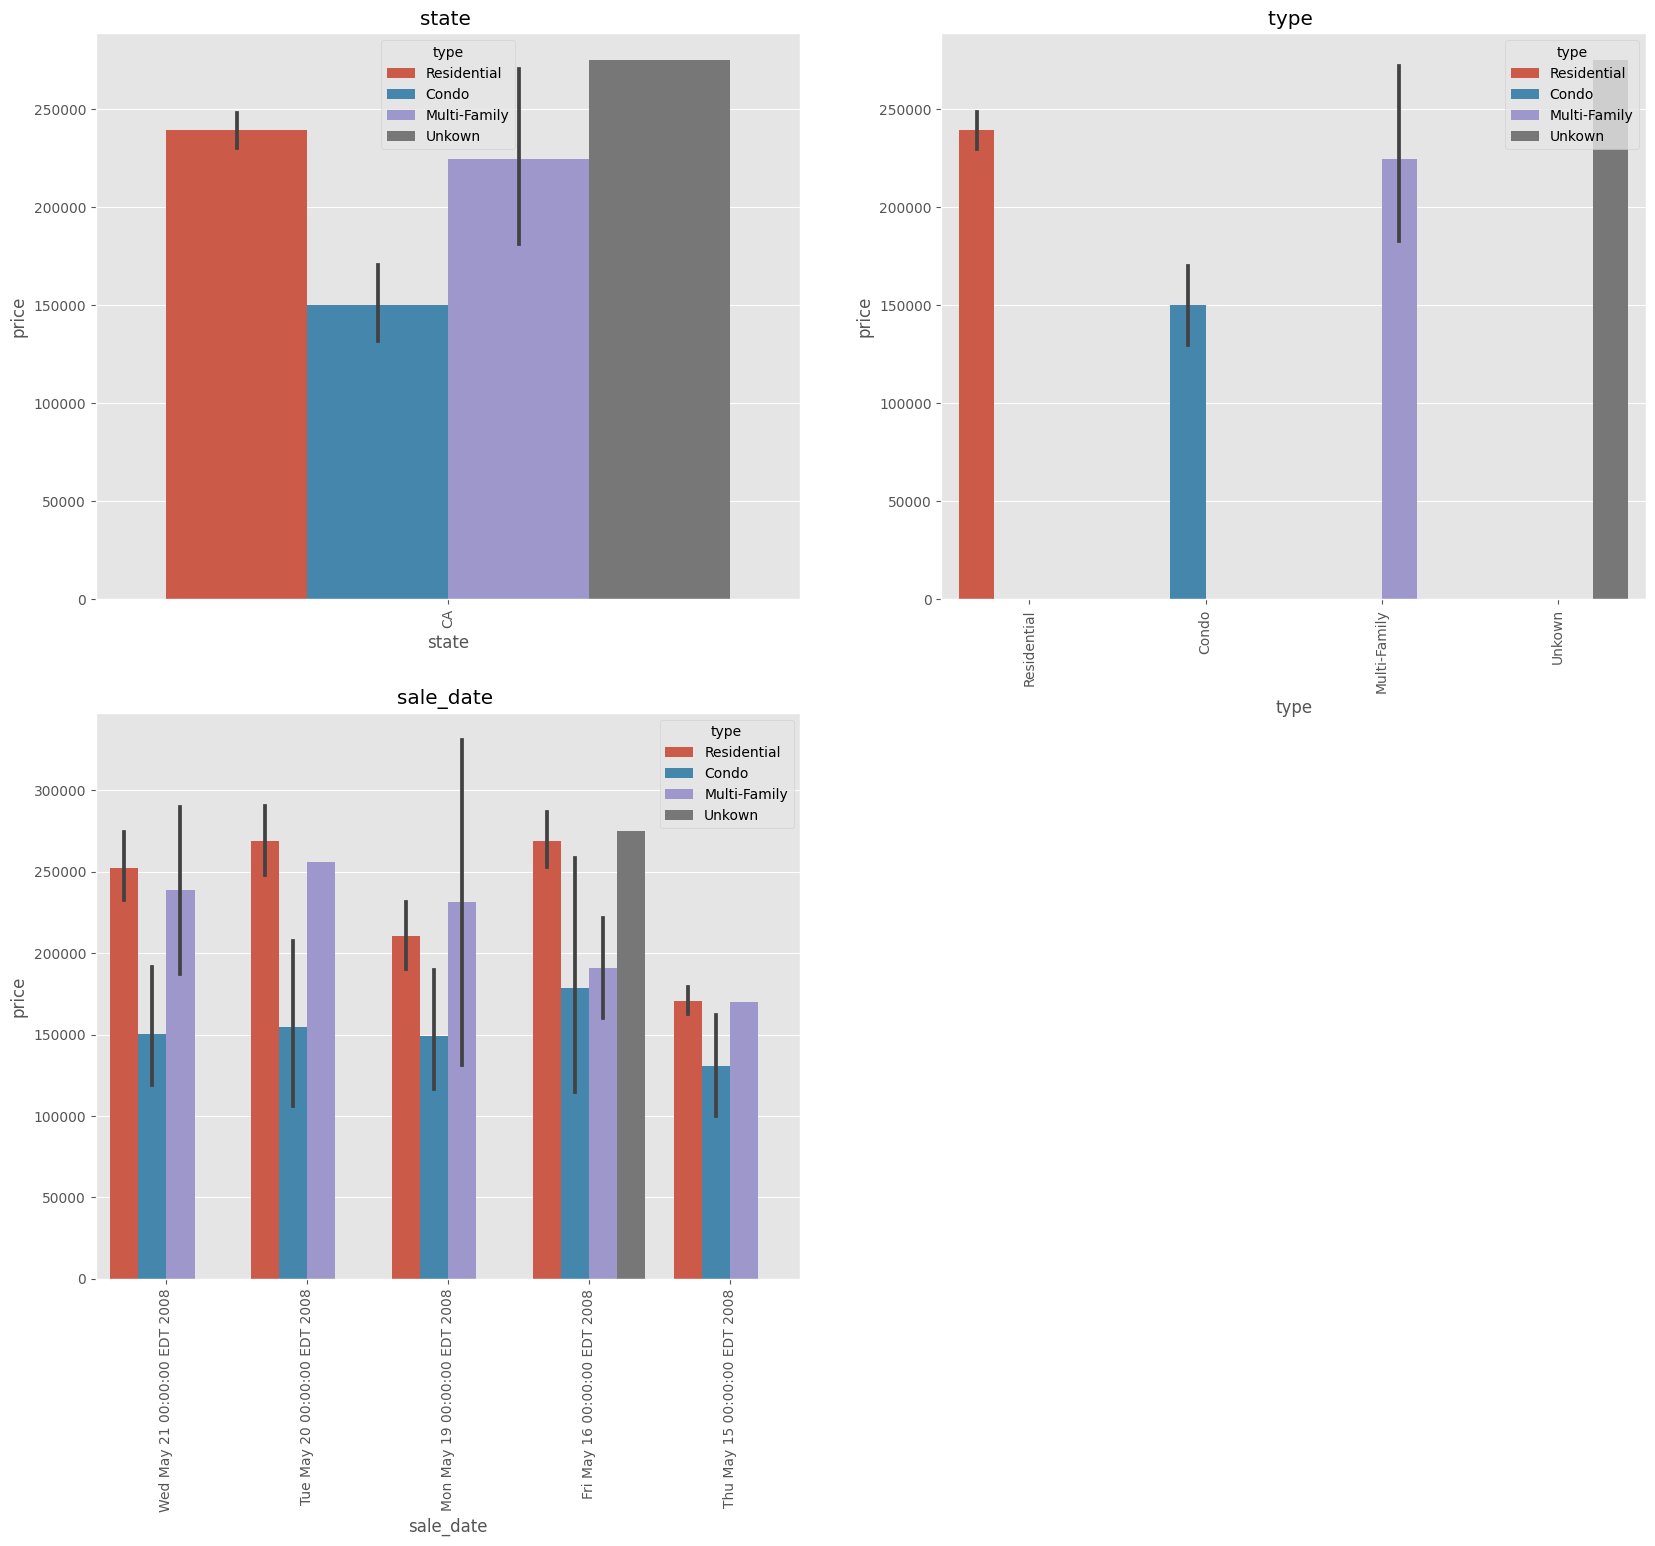

In [209]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 25))
plt.style.use("ggplot")

for i in categorical_features[2:]:
    plt.subplot(a, b, c)
    plt.title('{} '.format(i))
    sns.barplot(x = df[i], y = df["price"] , hue = df["type"])
    plt.xticks(rotation=90)
    

    c = c + 1

plt.show()

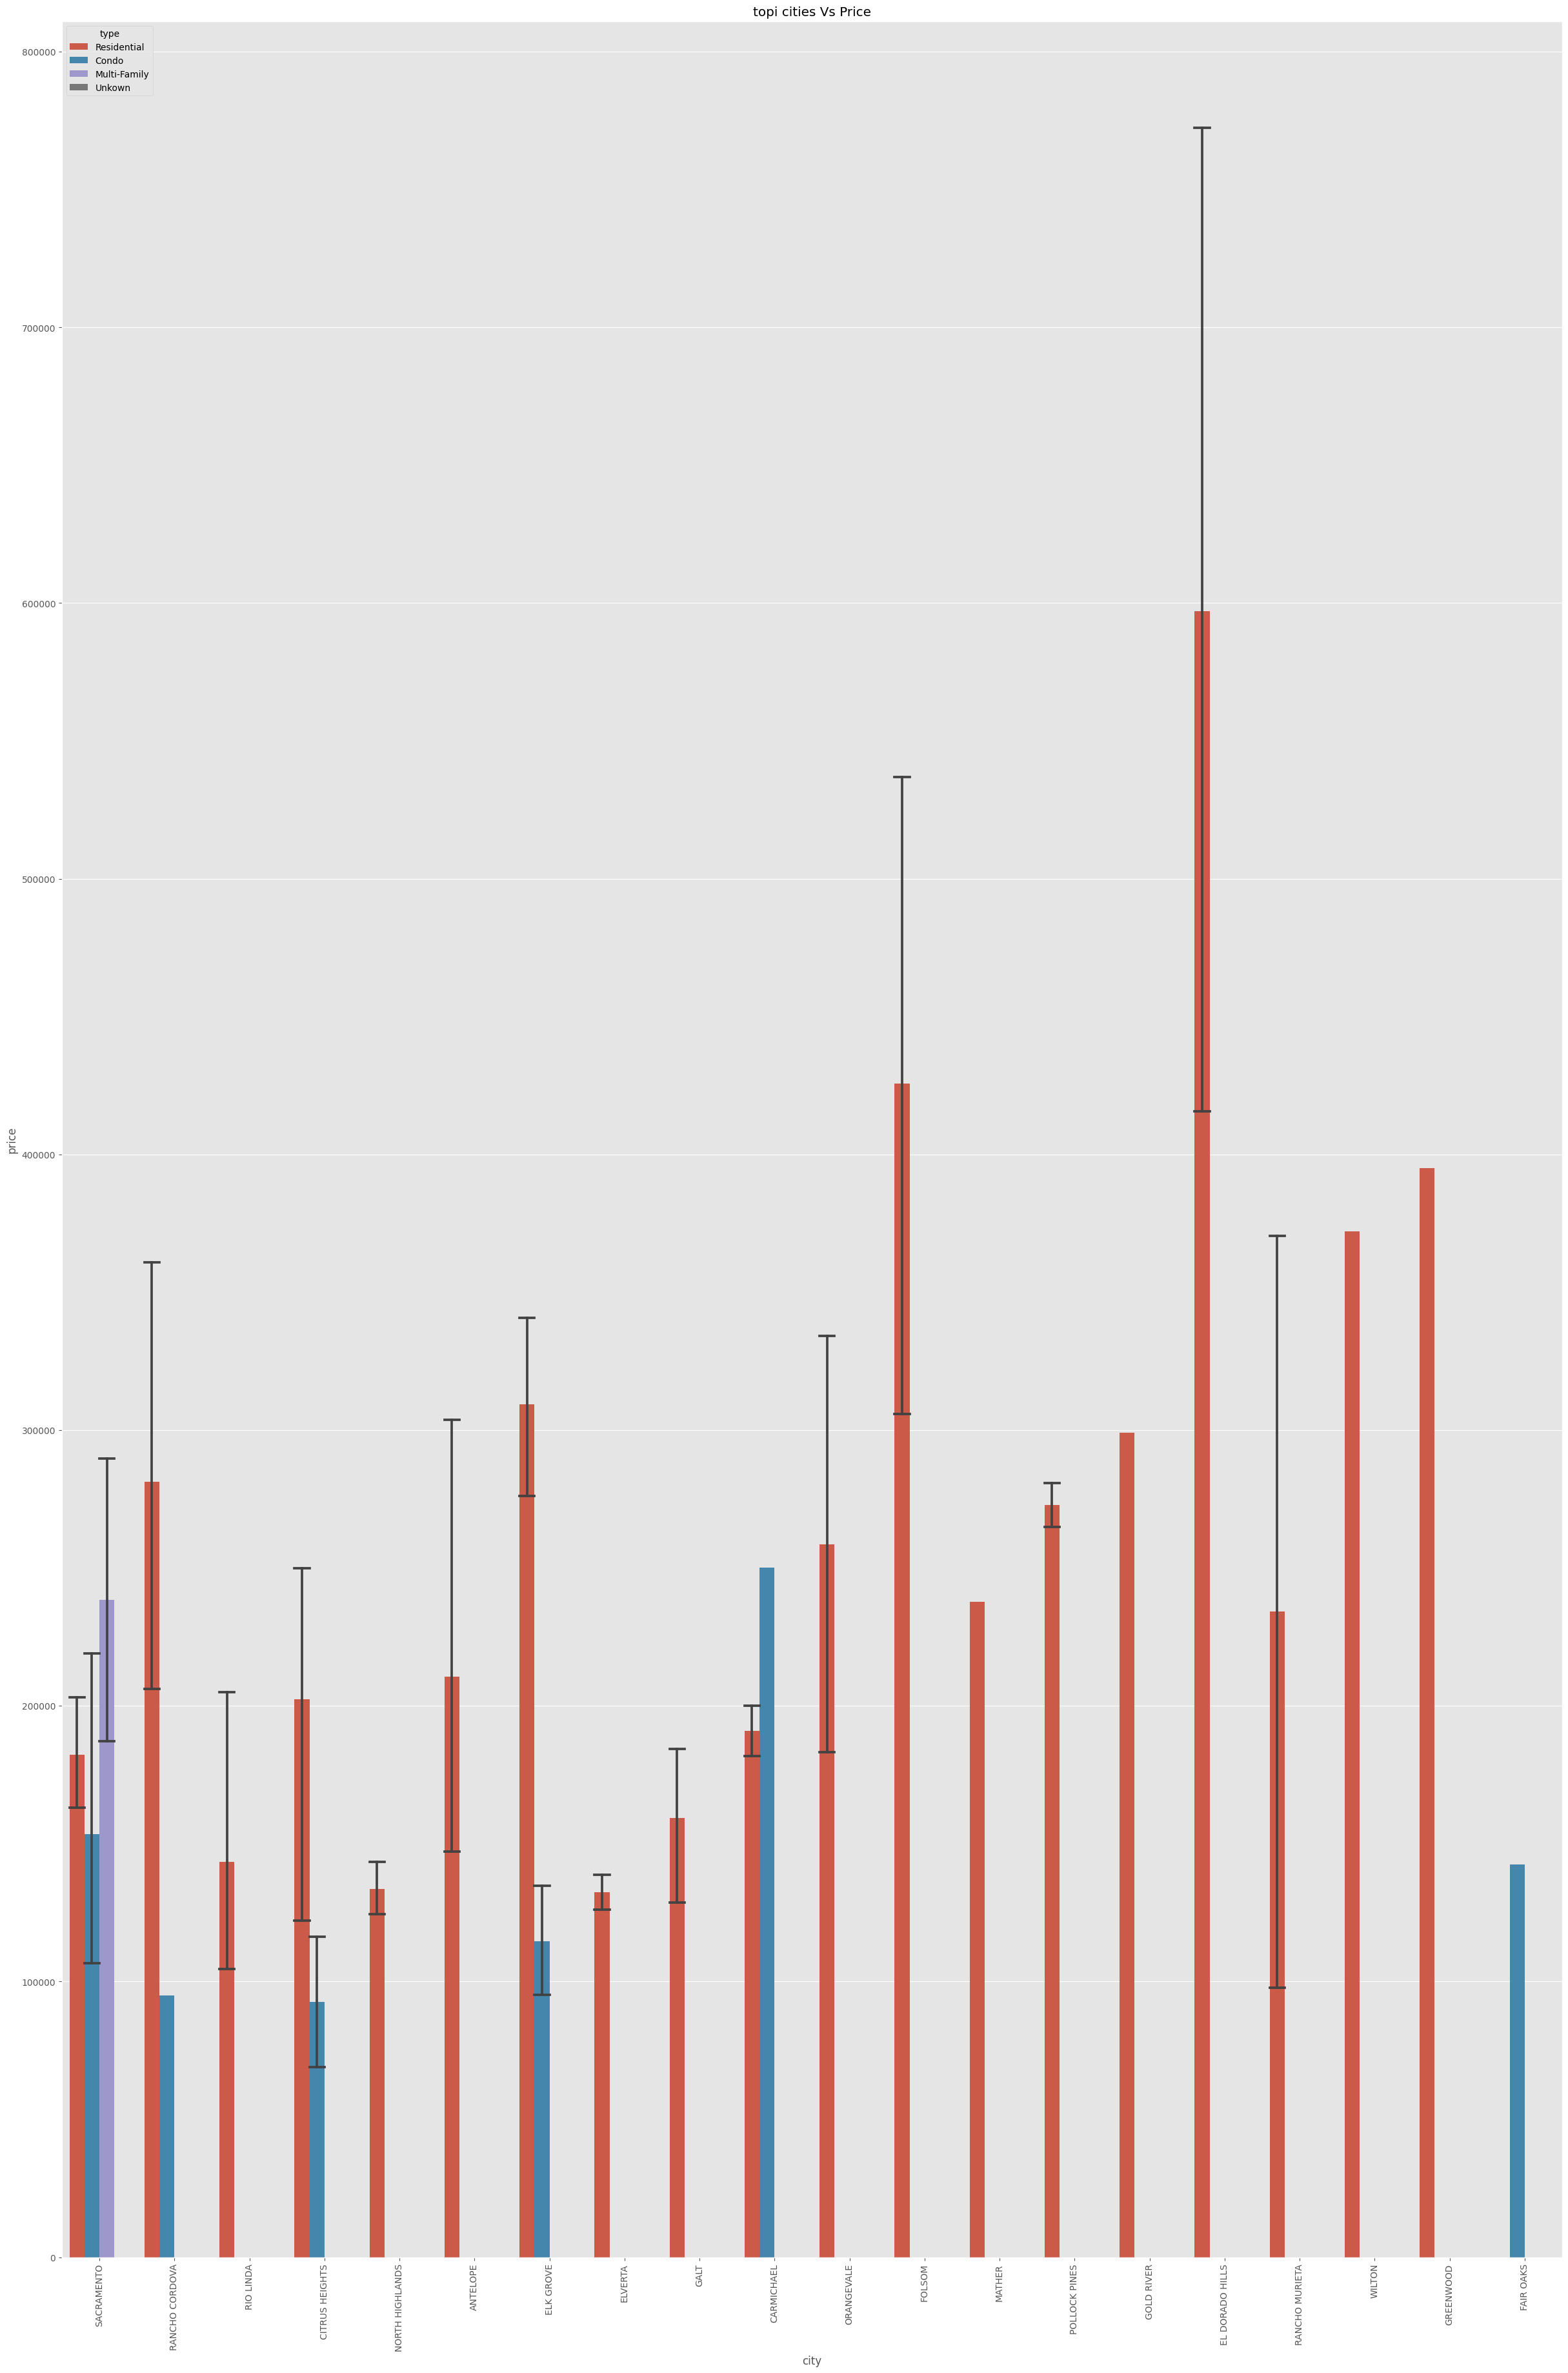

In [283]:

plt.figure(figsize=(30,45))
sns.barplot(y = df["price"], x = df.city.head(200) , hue = df["type"], capsize=.2)
plt.title("topi cities Vs Price")
plt.xticks(rotation=90)

plt.show()